In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
event_data = pd.read_csv('event_data_train.zip')

In [4]:
event_data

,step_id,timestamp,action,user_id
0,32815,1434340848,viewed,17632
1,32815,1434340848,passed,17632
2,32815,1434340848,discovered,17632
3,32811,1434340895,discovered,17632
4,32811,1434340895,viewed,17632
...,...,...,...,...
3480698,33375,1526772685,viewed,11677
3480699,32815,1526772750,viewed,5198
3480700,32815,1526772750,discovered,5198
3480701,32815,1526772750,passed,5198


In [5]:
submissions_data = pd.read_csv('submissions_data_train.zip')

In [6]:
event_data

,step_id,timestamp,action,user_id
0,32815,1434340848,viewed,17632
1,32815,1434340848,passed,17632
2,32815,1434340848,discovered,17632
3,32811,1434340895,discovered,17632
4,32811,1434340895,viewed,17632
...,...,...,...,...
3480698,33375,1526772685,viewed,11677
3480699,32815,1526772750,viewed,5198
3480700,32815,1526772750,discovered,5198
3480701,32815,1526772750,passed,5198


# Базовый эксплорейшн данных

In [8]:
# смотрим уникальные действия action

event_data['action'].unique()

array(['viewed', 'passed', 'discovered', 'started_attempt'], dtype=object)

In [11]:
# создадим новую колонку с форматированным в читаемый вид даты:


# Работа с datetime форматом времени в pandas:


# https://medium.datadriveninvestor.com/how-to-work-with-dates-in-pandas-like-a-pro-a84055a4819d

# https://www.geeksforgeeks.org/python-working-with-date-and-time-using-pandas/

# https://python-scripts.com/datetime-time-python


event_data['date'] = pd.to_datetime(event_data['timestamp'], unit = 's')

In [12]:
event_data

,step_id,timestamp,action,user_id,date
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48
1,32815,1434340848,passed,17632,2015-06-15 04:00:48
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35
...,...,...,...,...,...
3480698,33375,1526772685,viewed,11677,2018-05-19 23:31:25
3480699,32815,1526772750,viewed,5198,2018-05-19 23:32:30
3480700,32815,1526772750,discovered,5198,2018-05-19 23:32:30
3480701,32815,1526772750,passed,5198,2018-05-19 23:32:30


In [13]:
event_data.dtypes

step_id               int64
timestamp             int64
action               object
user_id               int64
date         datetime64[ns]
dtype: object

In [93]:
# оценим временной отрезок наших данных:

event_data.date.min()

Timestamp('2015-06-15 04:00:48')

In [15]:
event_data.date.max()

Timestamp('2018-05-19 23:33:31')

In [16]:
event_data['day'] = event_data.date.dt.date

In [17]:
event_data

,step_id,timestamp,action,user_id,date,day
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15
...,...,...,...,...,...,...
3480698,33375,1526772685,viewed,11677,2018-05-19 23:31:25,2018-05-19
3480699,32815,1526772750,viewed,5198,2018-05-19 23:32:30,2018-05-19
3480700,32815,1526772750,discovered,5198,2018-05-19 23:32:30,2018-05-19
3480701,32815,1526772750,passed,5198,2018-05-19 23:32:30,2018-05-19


# Визуализация уникальных пользователей по дате

In [18]:
event_data.groupby('day').user_id.nunique().head(5)

day
2015-06-15    705
2015-06-16    526
2015-06-17    440
2015-06-18    411
2015-06-19    377
Name: user_id, dtype: int64

In [20]:
# задает форматирование всем дальнейшим рисункам: sns и plt

sns.set(rc={'figure.figsize': (9, 6)})

<Axes: xlabel='day'>

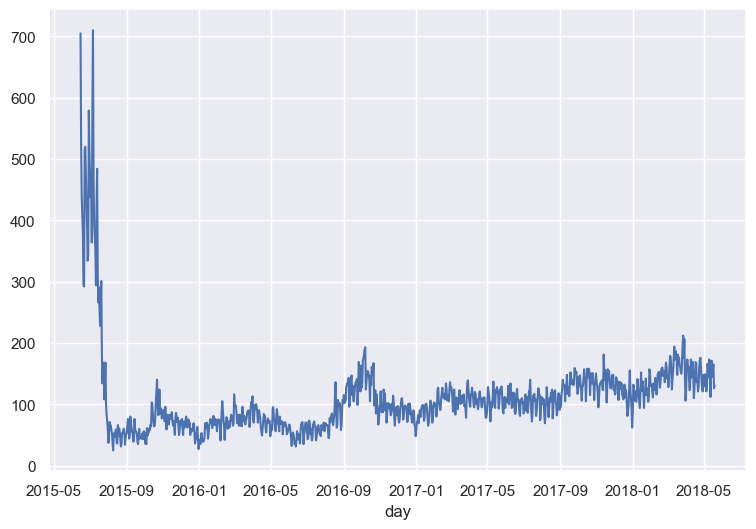

In [21]:
event_data.groupby('day').user_id.nunique().plot()

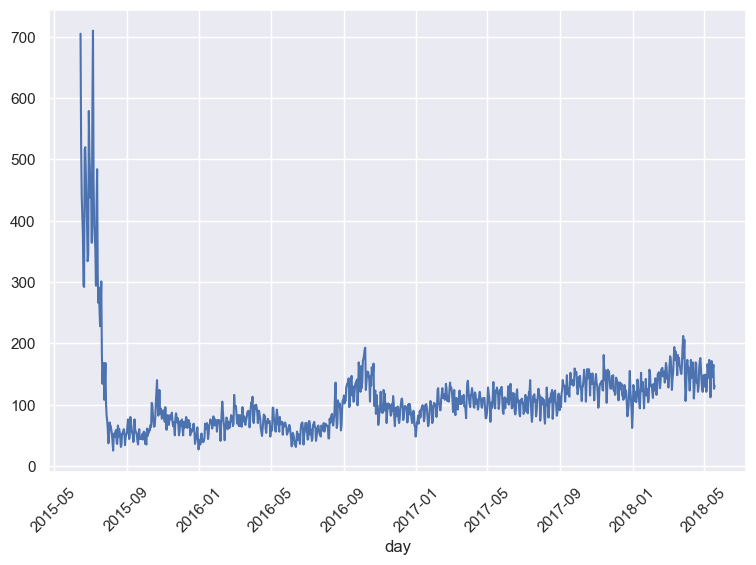

In [44]:
event_data.groupby('day').user_id.nunique().plot().tick_params(axis='x', rotation=45)

<Axes: xlabel='day'>

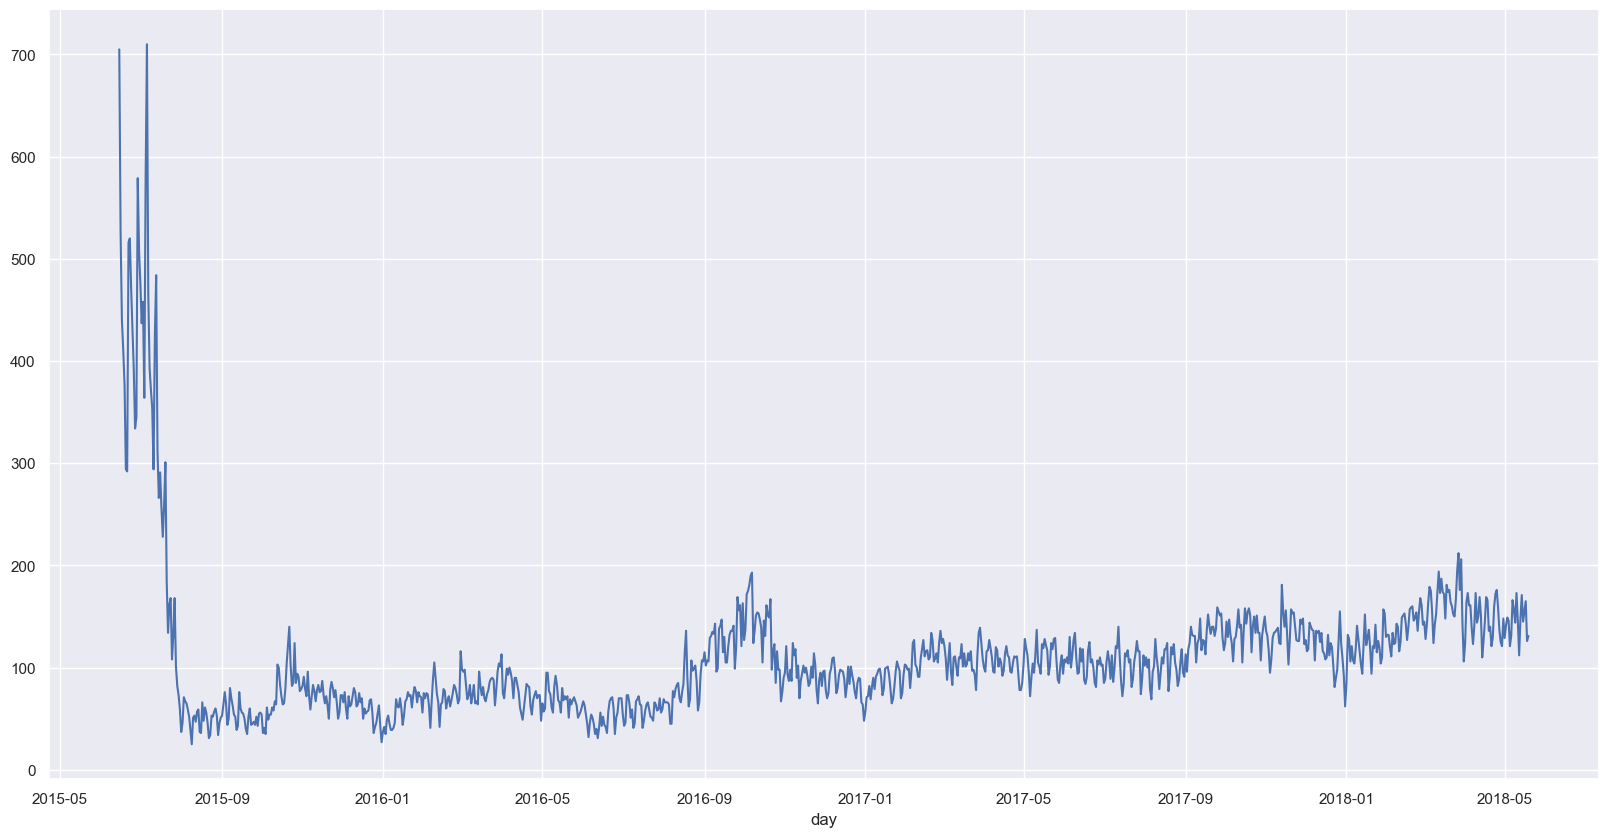

In [45]:
event_data.groupby('day').user_id.nunique().plot(figsize=(20,10))

<Axes: xlabel='date'>

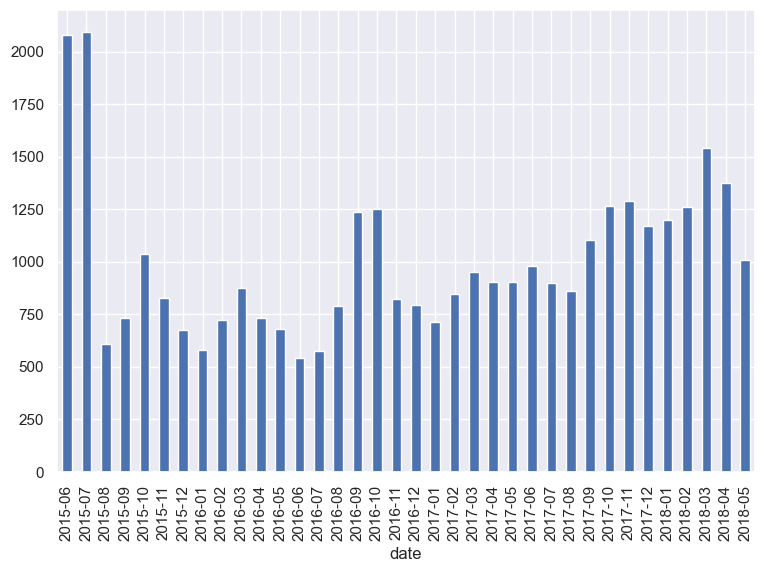

In [46]:
# Столбчатая по месяцам: ('M')

event_data['date'] = pd.to_datetime(event_data['timestamp'], unit='s').dt.to_period('M')
prepared = event_data.groupby('date').user_id.nunique()
prepared.plot(kind='bar')

# Подсчет числа пройденных степов:

In [22]:
event_data

,step_id,timestamp,action,user_id,date,day
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15
...,...,...,...,...,...,...
3480698,33375,1526772685,viewed,11677,2018-05-19 23:31:25,2018-05-19
3480699,32815,1526772750,viewed,5198,2018-05-19 23:32:30,2018-05-19
3480700,32815,1526772750,discovered,5198,2018-05-19 23:32:30,2018-05-19
3480701,32815,1526772750,passed,5198,2018-05-19 23:32:30,2018-05-19


In [23]:
# как распределены пользователи по количеству баллов которые они набрали за курс?


### !!! ПРИ ТАКОМ ПОДХОДЕ ТЕРЯЮТСЯ ВСЕ, КТО НАБРАЛ 0 БАЛЛОВ: - ЭТО НЕ ПРАВИЛЬНЫЙ ВАРИАНТ РЕШЕНИЯ !!!


df = event_data[event_data['action'] == 'passed']

In [24]:
df1 = df.groupby(['user_id'], as_index = False)['user_id'].agg({'step_id':'count'})
df1.head()

,user_id,step_id
0,2,9
1,3,87
2,5,11
3,7,1
4,8,84


In [25]:
df1 = df1.rename(columns = {'step_id': 'passed_step'})

<Axes: >

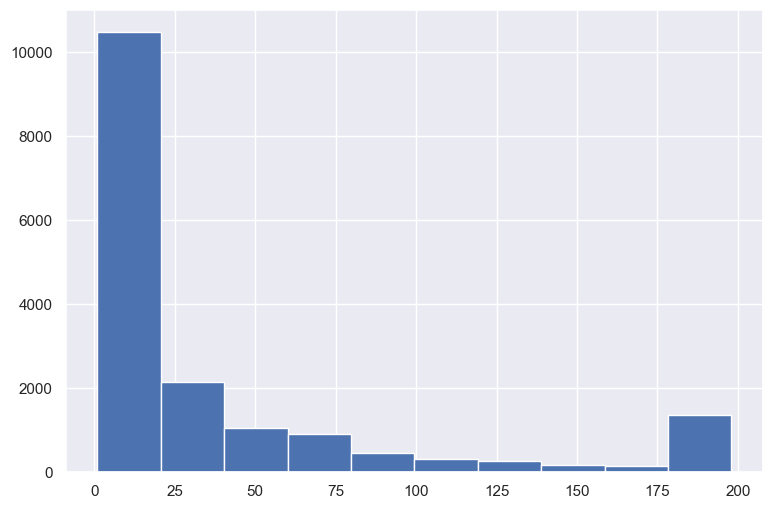

In [26]:
df1['passed_step'].hist()

In [27]:
### Должны быть пользователи которые не решили ни одного примера, а у нас минимаьное значение = 1

df1['passed_step'].min()

1

In [ ]:
# ПРАВИЛЬНОЕ РЕШЕНИЕ:

In [99]:
event_data.pivot_table(index = 'user_id', columns = 'action', values = 'step_id', aggfunc = 'count', fill_value=0).reset_index()

action,user_id,discovered,passed,started_attempt,viewed
0,1,1,0,0,1
1,2,9,9,2,10
2,3,91,87,30,192
3,5,11,11,4,12
4,7,1,1,0,1
...,...,...,...,...,...
19229,26790,8,8,1,9
19230,26793,1,0,1,1
19231,26794,69,69,34,180
19232,26797,10,10,2,13


In [30]:
df = event_data.pivot_table(index = 'user_id', 
                            columns = 'action', 
                            values = 'step_id', 
                            aggfunc = 'count', 
                            fill_value=0).reset_index()

array([[<Axes: title={'center': 'discovered'}>]], dtype=object)

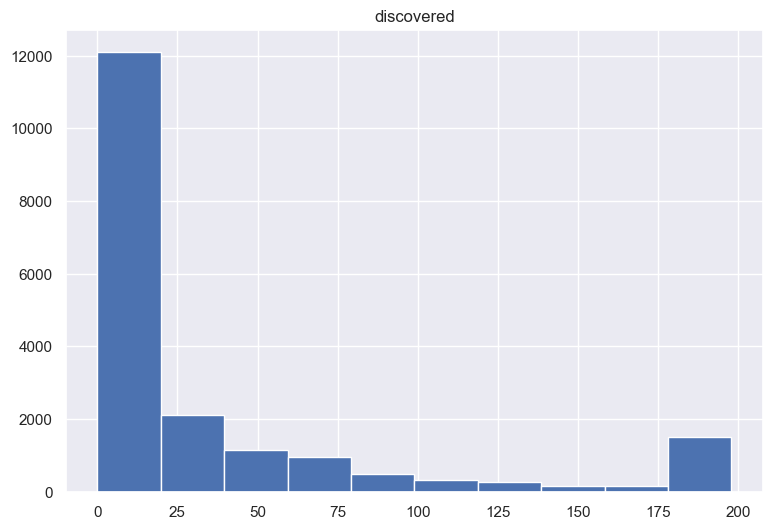

In [31]:
# здесь получилось 12000 в первом бине - на 2000 ! человек больше, которых мы потеряли при тупом фильтре выше.

df[['discovered']].hist()

In [32]:
# те же данные можно было бы получить из другой таблицы:

submissions_data = pd.read_csv('submissions_data_train.zip')

In [33]:
submissions_data

,step_id,timestamp,submission_status,user_id
0,31971,1434349275,correct,15853
1,31972,1434348300,correct,15853
2,31972,1478852149,wrong,15853
3,31972,1478852164,correct,15853
4,31976,1434348123,wrong,15853
...,...,...,...,...
509099,120745,1501946959,wrong,2615
509100,120745,1503059927,correct,13177
509101,120745,1506348153,wrong,15253
509102,120745,1523035316,wrong,1424


In [34]:
# создадим новую колонку с форматированным в читаемый вид даты:

submissions_data['date'] = pd.to_datetime(submissions_data['timestamp'], unit = 's')

In [35]:
submissions_data['day'] = submissions_data.date.dt.date

In [36]:
submissions_data

,step_id,timestamp,submission_status,user_id,date,day
0,31971,1434349275,correct,15853,2015-06-15 06:21:15,2015-06-15
1,31972,1434348300,correct,15853,2015-06-15 06:05:00,2015-06-15
2,31972,1478852149,wrong,15853,2016-11-11 08:15:49,2016-11-11
3,31972,1478852164,correct,15853,2016-11-11 08:16:04,2016-11-11
4,31976,1434348123,wrong,15853,2015-06-15 06:02:03,2015-06-15
...,...,...,...,...,...,...
509099,120745,1501946959,wrong,2615,2017-08-05 15:29:19,2017-08-05
509100,120745,1503059927,correct,13177,2017-08-18 12:38:47,2017-08-18
509101,120745,1506348153,wrong,15253,2017-09-25 14:02:33,2017-09-25
509102,120745,1523035316,wrong,1424,2018-04-06 17:21:56,2018-04-06


<Axes: xlabel='day'>

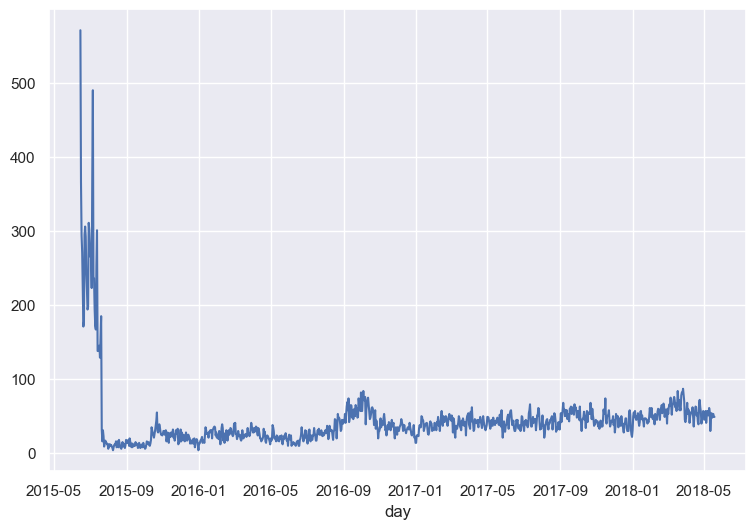

In [37]:
submissions_data.groupby('day').user_id.nunique().plot()

In [38]:
df = submissions_data[submissions_data['submission_status'] == 'correct']

array([[<Axes: title={'center': 'step_id'}>,
        <Axes: title={'center': 'timestamp'}>],
       [<Axes: title={'center': 'submission_status'}>,
        <Axes: title={'center': 'date'}>],
       [<Axes: title={'center': 'day'}>, <Axes: >]], dtype=object)

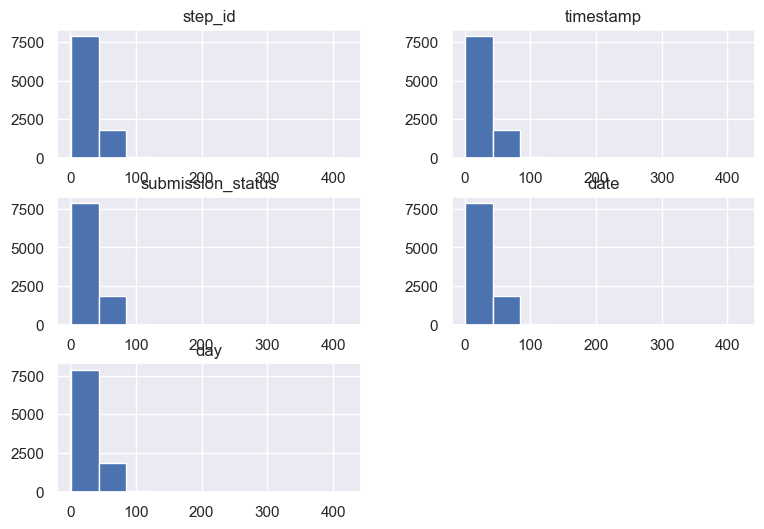

In [39]:
df.groupby('user_id').count().hist()

In [40]:
df

,step_id,timestamp,submission_status,user_id,date,day
0,31971,1434349275,correct,15853,2015-06-15 06:21:15,2015-06-15
1,31972,1434348300,correct,15853,2015-06-15 06:05:00,2015-06-15
3,31972,1478852164,correct,15853,2016-11-11 08:16:04,2016-11-11
5,31976,1434348188,correct,15853,2015-06-15 06:03:08,2015-06-15
6,31976,1478852055,correct,15853,2016-11-11 08:14:15,2016-11-11
...,...,...,...,...,...,...
509094,120745,1496579309,correct,19647,2017-06-04 12:28:29,2017-06-04
509095,120745,1496907706,correct,25663,2017-06-08 07:41:46,2017-06-08
509097,120745,1500154533,correct,3310,2017-07-15 21:35:33,2017-07-15
509098,120745,1501849684,correct,6012,2017-08-04 12:28:04,2017-08-04


In [41]:
df = submissions_data.pivot_table(index = 'user_id', 
                            columns = 'submission_status', 
                            values = 'step_id', 
                            aggfunc = 'count', 
                            fill_value=0).reset_index()

In [42]:
df

submission_status,user_id,correct,wrong
0,2,2,0
1,3,29,23
2,5,2,2
3,8,9,21
4,14,0,1
...,...,...,...
9935,26787,3,0
9936,26790,1,0
9937,26794,33,9
9938,26797,2,0


<Axes: >

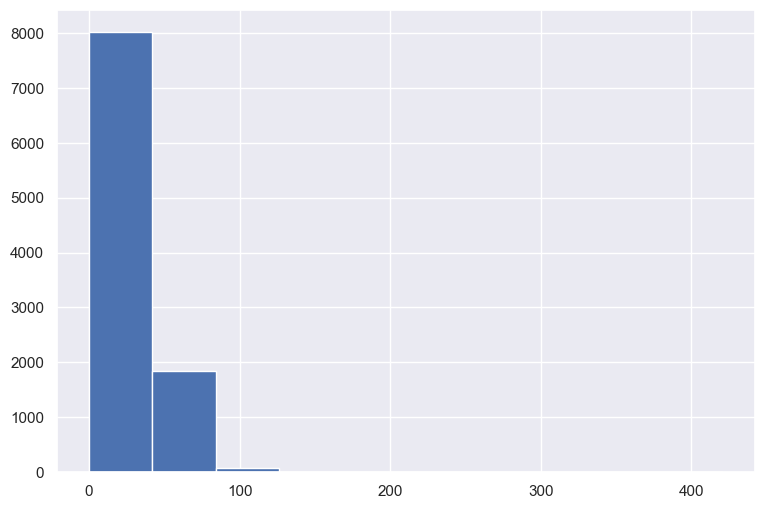

In [43]:
df.correct.hist()

# Определение допустимых перерывов в решении задач курса

In [ ]:
# чтобы определить порог при котором мы считаем, что пользователь ушёл с курса

In [48]:
# считаем статистику сколько человек в среднем отсутствовал на курсе:

# оставим только нужные для расчета колонки

# удалим дубликаты 'user_id', 'day', т.к. считаем активностью уже то, что в этот день человек заходил
# такая команда оставит только одну строчу для каждого юзера, для каждого дня когда он был онлайн

# все timestamp - уникальные! - если добавить timestamp в subset 
# - то ничего не удалиться потому что дублироующих строк не будет

df = event_data[['user_id', 'day', 'timestamp']].drop_duplicates(subset = ['user_id', 'day'])
df

,user_id,day,timestamp
0,17632,2015-06-15,1434340848
36,12494,2015-06-15,1434341931
59,442,2015-06-15,1434342029
62,22254,2015-06-15,1434342042
94,6646,2015-06-15,1434342230
...,...,...,...
3480298,364,2018-05-19,1526762223
3480329,22851,2018-05-19,1526762629
3480333,943,2018-05-19,1526762664
3480669,26659,2018-05-19,1526770439


In [55]:
# теперь для каждого юзера надо посчитать разницу между его таймстэмпами

# так можно посчитать для каждого юзера количество таймстемпов за каждую уникальную дату:
df.groupby('user_id')['timestamp'].count()

user_id
1        1
2        2
3        7
5        2
7        1
        ..
26790    4
26793    1
26794    9
26797    2
26798    1
Name: timestamp, Length: 19234, dtype: int64

In [56]:
# так в list передаем списки с таймстемпами:

df.groupby('user_id')['timestamp'].apply(list)

user_id
1                                             [1472827464]
2                                 [1514383364, 1519226966]
3        [1434358476, 1441257725, 1441440209, 144153391...
5                                 [1466156809, 1499859621]
7                                             [1521634660]
                               ...                        
26790     [1451484016, 1451722241, 1452616205, 1517495853]
26793                                         [1510225031]
26794    [1495287049, 1495373177, 1495509936, 149560483...
26797                             [1508425316, 1509993306]
26798                                         [1520975763]
Name: timestamp, Length: 19234, dtype: object

In [57]:
# теперь для каждого пользователя можно посчитать перерывы которые были у него между таймстемпами:

# np.diff как раз возвращает значение разницы между двумя соседними числами

df.groupby('user_id')['timestamp'].apply(list).apply(np.diff)

user_id
1                                                       []
2                                                [4843602]
3         [6899249, 182484, 93710, 2768870, 171400, 78712]
5                                               [33702812]
7                                                       []
                               ...                        
26790                           [238225, 893964, 64879648]
26793                                                   []
26794    [86128, 136759, 94899, 1422583, 14347289, 5050...
26797                                            [1567990]
26798                                                   []
Name: timestamp, Length: 19234, dtype: object

In [91]:
# при помощи .values - получаем array состоящий из других arrays

df.groupby('user_id')['timestamp'].apply(list).apply(np.diff).values

array([array([], dtype=int32), array([4843602]),
       array([6899249,  182484,   93710, 2768870,  171400,   78712]), ...,
       array([   86128,   136759,    94899,  1422583, 14347289,   505061,
                 98252,    57019])                                       ,
       array([1567990]), array([], dtype=int32)], dtype=object)

In [72]:
# эти arrays можно сконкатенировать между собой и объединить в серию:

# мы получаем все промежутки между посещениями без относительно user_id

gap_data = df.groupby('user_id')['timestamp'].apply(list).apply(np.diff).values

gap_data = pd.Series(np.concatenate(gap_data, axis = 0))
gap_data

0         4843602
1         6899249
2          182484
3           93710
4         2768870
           ...   
97867    14347289
97868      505061
97869       98252
97870       57019
97871     1567990
Length: 97872, dtype: int32

In [74]:
# эти значения это разница между посещениями в секундах

# получим разницу между посещениями в днях:

gap_data = gap_data / (60*60*24)

gap_data

0         56.060208
1         79.852419
2          2.112083
3          1.084606
4         32.047106
            ...    
97867    166.056586
97868      5.845613
97869      1.137176
97870      0.659942
97871     18.148032
Length: 97872, dtype: float64

<Axes: >

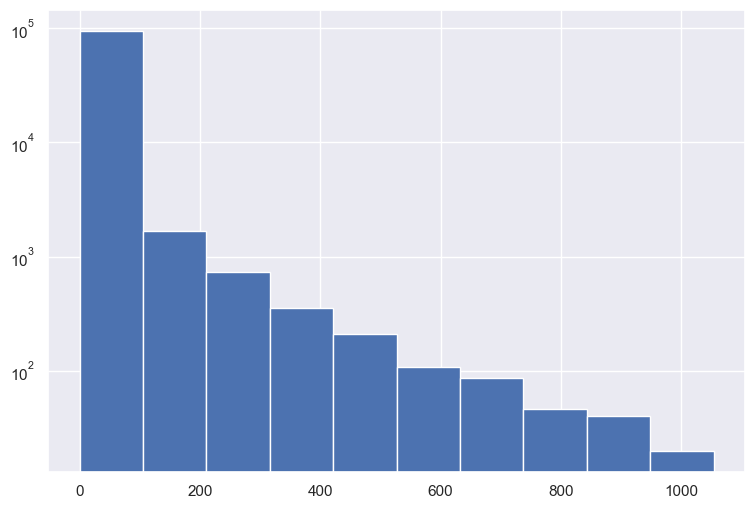

In [85]:
# получаем разброс промежутков между заходами от 0 до 1000 дней, причем осовная масса сосредоточена ближе к нулю


gap_data.hist(log = True)

<Axes: >

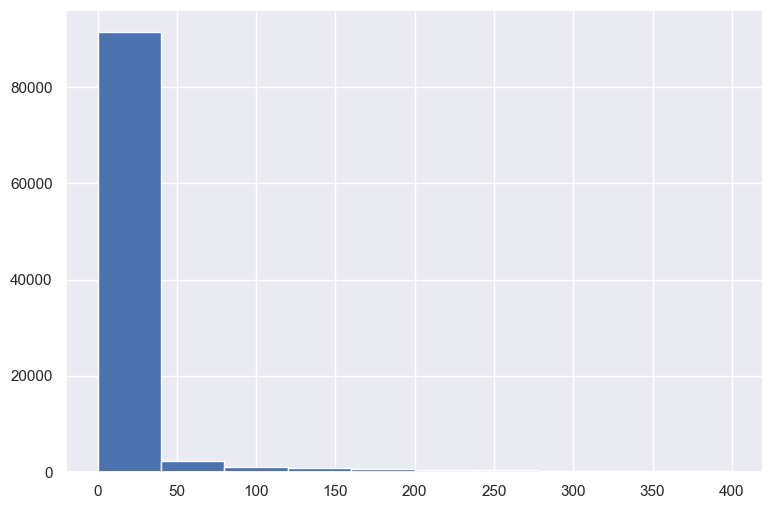

In [89]:
# отфильтруем выбросы когда промежуток между заходами на сайт более 400 например дней - уберем

# gap_data[gap_data < 400].hist(log = True)
gap_data[gap_data < 400].hist()

In [88]:
# бОльшая часть всех наблюдений укладывается в интервал от 0 до 100 дней

# берем квантиль 95% который дает нам значение в которые укладываются 95% всех наших наблюдений

# ЧТО ГОВОРИТ НАМ ЭТА ЦИФРА: только 5% пользователей возвращается на курс после перервыва 59 дней.

gap_data.quantile(0.95)

59.760440972222156

In [92]:
# если взять квантиль 90% то мы получим значение промежутков в днях которые делает 90% пользователей

gap_data.quantile(0.90)

18.325995370370403

In [ ]:
# то есть 10% пользователей делает перерыв больше 18 дней и потом возвращаются.
# 5% пользователей делает перерыв больше 59 дней и потом возвращаются.

# что-то среднее можно считать рубежом когда пользователя можно считать невозвращенцем

# ИЗ КОММЕНТАРИЕВ:
    
# Не понятен вывод о 30 днях... ведь мы в gaps_data рассматриваем перерывы 
# пользователей, т.е. квантиль 0.95 говорит лишь о том, что есть 
# пользователи, которые сделали перерыв в 59 дней 
# (т.е. они снова пришли на курс через 59 дней!). 
# Писал и сам ответил на свой вопрос, конечно - таких пользователей 
# очень мало, т.е. так практически никто не делает, 
# а значит действительно 30 дней - это хороший вывод.

In [ ]:
# Задача

# за каким user_id скрывается Анатолий Карпов??

In [95]:
event_data

,step_id,timestamp,action,user_id,date,day
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15
...,...,...,...,...,...,...
3480698,33375,1526772685,viewed,11677,2018-05-19 23:31:25,2018-05-19
3480699,32815,1526772750,viewed,5198,2018-05-19 23:32:30,2018-05-19
3480700,32815,1526772750,discovered,5198,2018-05-19 23:32:30,2018-05-19
3480701,32815,1526772750,passed,5198,2018-05-19 23:32:30,2018-05-19


In [131]:
correct_submissions_data = submissions_data[submissions_data.submission_status == 'correct']
correct_submissions_data

,step_id,timestamp,submission_status,user_id,date,day
0,31971,1434349275,correct,15853,2015-06-15 06:21:15,2015-06-15
1,31972,1434348300,correct,15853,2015-06-15 06:05:00,2015-06-15
3,31972,1478852164,correct,15853,2016-11-11 08:16:04,2016-11-11
5,31976,1434348188,correct,15853,2015-06-15 06:03:08,2015-06-15
6,31976,1478852055,correct,15853,2016-11-11 08:14:15,2016-11-11
...,...,...,...,...,...,...
509094,120745,1496579309,correct,19647,2017-06-04 12:28:29,2017-06-04
509095,120745,1496907706,correct,25663,2017-06-08 07:41:46,2017-06-08
509097,120745,1500154533,correct,3310,2017-07-15 21:35:33,2017-07-15
509098,120745,1501849684,correct,6012,2017-08-04 12:28:04,2017-08-04


In [136]:
correct_submissions_data.groupby('user_id')['submission_status'].count().sort_values(ascending = False).head(1)

user_id
1046    421
Name: submission_status, dtype: int64

In [ ]:
# Значит если пользователь еще не получил сертификат и более 30 дней отсутствует - считаем его дропнувшим:

In [210]:
# смотрим последнюю дату - дату выгрузки даннных: 2018-05-19 (1526772811): ЭТО ТЕКУЩИЙ ДЕНЬ - ОТ НЕГО СЧИТАЕМ 

event_data.tail()

,step_id,timestamp,action,user_id,date,day
3480698,33375,1526772685,viewed,11677,2018-05-19 23:31:25,2018-05-19
3480699,32815,1526772750,viewed,5198,2018-05-19 23:32:30,2018-05-19
3480700,32815,1526772750,discovered,5198,2018-05-19 23:32:30,2018-05-19
3480701,32815,1526772750,passed,5198,2018-05-19 23:32:30,2018-05-19
3480702,33892,1526772811,viewed,18526,2018-05-19 23:33:31,2018-05-19


In [211]:
# рассчитаем максимальное время (максимальный timestamp) появления на курсе каждого юзера:

event_data.groupby('user_id', as_index = False)['timestamp'].max()

,user_id,timestamp
0,1,1472827464
1,2,1519226966
2,3,1444581588
3,5,1499859939
4,7,1521634660
...,...,...
19229,26790,1517495987
19230,26793,1510225034
19231,26794,1512035039
19232,26797,1509995096


In [212]:
# и нас интересует больше ли этот максимальный timestamp чем заведенное нами пороговое значение в 30 дней:

# в секундах месяц будет выглядеть так:

30 * (60 * 60 * 24)

2592000

In [ ]:
# рассчитаем для каждого юзера сколько дней прошло с его максимального timestamp (то есть когда он заходил последний раз)
# сколько времени прошло от текущей даты (даты выгрузки данных см. выше)

In [213]:
df = event_data.groupby('user_id', as_index = False)['timestamp'].max().rename(columns = {'timestamp': 'last_timestamp'})
df

,user_id,last_timestamp
0,1,1472827464
1,2,1519226966
2,3,1444581588
3,5,1499859939
4,7,1521634660
...,...,...
19229,26790,1517495987
19230,26793,1510225034
19231,26794,1512035039
19232,26797,1509995096


In [214]:
# 1526772811 - это текущая дата (см.выше)

df['Diff'] = 1526772811 - df.last_timestamp

In [215]:
df['is_gone'] = df['Diff'] > 30 * 60 * 60 * 24

In [216]:
df

,user_id,last_timestamp,Diff,is_gone
0,1,1472827464,53945347,True
1,2,1519226966,7545845,True
2,3,1444581588,82191223,True
3,5,1499859939,26912872,True
4,7,1521634660,5138151,True
...,...,...,...,...
19229,26790,1517495987,9276824,True
19230,26793,1510225034,16547777,True
19231,26794,1512035039,14737772,True
19232,26797,1509995096,16777715,True


In [217]:
# зададим получившемуся df название users_data:

users_data = df

In [218]:
# теперь нам надо поянть сколько заданий решил каждый пользователь

user_scores = submissions_data.pivot_table(index = 'user_id', 
                            columns = 'submission_status', 
                            values = 'step_id', 
                            aggfunc = 'count', 
                            fill_value=0).reset_index()
user_scores

submission_status,user_id,correct,wrong
0,2,2,0
1,3,29,23
2,5,2,2
3,8,9,21
4,14,0,1
...,...,...,...
9935,26787,3,0
9936,26790,1,0
9937,26794,33,9
9938,26797,2,0


In [219]:
# теперь смёржим users_data и user_scores:

users_data = pd.merge(users_data, user_scores, on = 'user_id', how = 'outer').fillna(0)
users_data

,user_id,last_timestamp,Diff,is_gone,correct,wrong
0,1,1472827464,53945347,True,0.0,0.0
1,2,1519226966,7545845,True,2.0,0.0
2,3,1444581588,82191223,True,29.0,23.0
3,5,1499859939,26912872,True,2.0,2.0
4,7,1521634660,5138151,True,0.0,0.0
...,...,...,...,...,...,...
19229,26790,1517495987,9276824,True,1.0,0.0
19230,26793,1510225034,16547777,True,0.0,0.0
19231,26794,1512035039,14737772,True,33.0,9.0
19232,26797,1509995096,16777715,True,2.0,0.0


In [220]:
# с помощью pivot_table сделаем для каждого юзера подсчет его событий (action) из таблицы event_data:

users_event_data = event_data.pivot_table(index = 'user_id', 
                            columns = 'action', 
                            values = 'step_id', 
                            aggfunc = 'count', 
                            fill_value=0).reset_index()
users_event_data

action,user_id,discovered,passed,started_attempt,viewed
0,1,1,0,0,1
1,2,9,9,2,10
2,3,91,87,30,192
3,5,11,11,4,12
4,7,1,1,0,1
...,...,...,...,...,...
19229,26790,8,8,1,9
19230,26793,1,0,1,1
19231,26794,69,69,34,180
19232,26797,10,10,2,13


In [221]:
# и так же примёржим ее к итоговой таблице:

all_features = pd.merge(users_data, users_event_data, on = 'user_id', how = 'outer')
all_features

,user_id,last_timestamp,Diff,is_gone,correct,wrong,discovered,passed,started_attempt,viewed
0,1,1472827464,53945347,True,0.0,0.0,1,0,0,1
1,2,1519226966,7545845,True,2.0,0.0,9,9,2,10
2,3,1444581588,82191223,True,29.0,23.0,91,87,30,192
3,5,1499859939,26912872,True,2.0,2.0,11,11,4,12
4,7,1521634660,5138151,True,0.0,0.0,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...
19229,26790,1517495987,9276824,True,1.0,0.0,8,8,1,9
19230,26793,1510225034,16547777,True,0.0,0.0,1,0,1,1
19231,26794,1512035039,14737772,True,33.0,9.0,69,69,34,180
19232,26797,1509995096,16777715,True,2.0,0.0,10,10,2,13


In [222]:
# Не хватает одной важной фичи - сколько юзер провел уникальных дней на курсе

event_data

,step_id,timestamp,action,user_id,date,day
0,32815,1434340848,viewed,17632,2015-06-15 04:00:48,2015-06-15
1,32815,1434340848,passed,17632,2015-06-15 04:00:48,2015-06-15
2,32815,1434340848,discovered,17632,2015-06-15 04:00:48,2015-06-15
3,32811,1434340895,discovered,17632,2015-06-15 04:01:35,2015-06-15
4,32811,1434340895,viewed,17632,2015-06-15 04:01:35,2015-06-15
...,...,...,...,...,...,...
3480698,33375,1526772685,viewed,11677,2018-05-19 23:31:25,2018-05-19
3480699,32815,1526772750,viewed,5198,2018-05-19 23:32:30,2018-05-19
3480700,32815,1526772750,discovered,5198,2018-05-19 23:32:30,2018-05-19
3480701,32815,1526772750,passed,5198,2018-05-19 23:32:30,2018-05-19


In [223]:
unique_event_data = event_data.drop_duplicates(subset = ['user_id', 'day'])

In [224]:
days_on_course = unique_event_data.groupby('user_id')['day'].count().reset_index().rename(columns = {'day': 'days_on_course'})
days_on_course

,user_id,days_on_course
0,1,1
1,2,2
2,3,7
3,5,2
4,7,1
...,...,...
19229,26790,4
19230,26793,1
19231,26794,9
19232,26797,2


In [225]:
all_features = pd.merge(all_features, days_on_course, on = 'user_id', how = 'outer')
all_features

,user_id,last_timestamp,Diff,is_gone,correct,wrong,discovered,passed,started_attempt,viewed,days_on_course
0,1,1472827464,53945347,True,0.0,0.0,1,0,0,1,1
1,2,1519226966,7545845,True,2.0,0.0,9,9,2,10,2
2,3,1444581588,82191223,True,29.0,23.0,91,87,30,192,7
3,5,1499859939,26912872,True,2.0,2.0,11,11,4,12,2
4,7,1521634660,5138151,True,0.0,0.0,1,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...
19229,26790,1517495987,9276824,True,1.0,0.0,8,8,1,9,4
19230,26793,1510225034,16547777,True,0.0,0.0,1,0,1,1,1
19231,26794,1512035039,14737772,True,33.0,9.0,69,69,34,180,9
19232,26797,1509995096,16777715,True,2.0,0.0,10,10,2,13,2


In [227]:
# Теперь надо задать итоговую метрику - юзер успешно закончил курс

# К этому можно подойти по-разному. Например юзер набрал больше 170 шагов

all_features['passed_course'] = all_features['passed'] > 170

all_features

,user_id,last_timestamp,Diff,is_gone,correct,wrong,discovered,passed,started_attempt,viewed,days_on_course,passed_course
0,1,1472827464,53945347,True,0.0,0.0,1,0,0,1,1,False
1,2,1519226966,7545845,True,2.0,0.0,9,9,2,10,2,False
2,3,1444581588,82191223,True,29.0,23.0,91,87,30,192,7,False
3,5,1499859939,26912872,True,2.0,2.0,11,11,4,12,2,False
4,7,1521634660,5138151,True,0.0,0.0,1,1,0,1,1,False
...,...,...,...,...,...,...,...,...,...,...,...,...
19229,26790,1517495987,9276824,True,1.0,0.0,8,8,1,9,4,False
19230,26793,1510225034,16547777,True,0.0,0.0,1,0,1,1,1,False
19231,26794,1512035039,14737772,True,33.0,9.0,69,69,34,180,9,False
19232,26797,1509995096,16777715,True,2.0,0.0,10,10,2,13,2,False


In [229]:
# теперь если сгруппировать по столбцу passed_course - мы увидим соотношение прошедших и не прошедших курс:

all_features.groupby('passed_course').count()

,user_id,last_timestamp,Diff,is_gone,correct,wrong,discovered,passed,started_attempt,viewed,days_on_course
passed_course,,,,,,,,,,,
False,17809,17809,17809,17809,17809,17809,17809,17809,17809,17809,17809
True,1425,1425,1425,1425,1425,1425,1425,1425,1425,1425,1425


In [232]:
# посчитаем проценты прошедших и не прошедших:

print('Прошли курс', (1425/(1425+17809)*100))
print('НЕ прошли курс', (17809/(1425+17809)*100))

Прошли курс 7.408755329104711
НЕ прошли курс 92.59124467089529
